In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [3]:
df = pd.read_pickle('../data/interim/processed_data.pkl')
df.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64


In [4]:
import random

x = df[['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']]

In [5]:
# Standardizing the features by scaling 

x_std = StandardScaler().fit_transform(x)

In [6]:
wcss = []

# random_state = Random number of generation for initializing centroids
# init = method for initializing the centroids
for i in range(1, 11):
    y_kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y_kmeans.fit(x_std)
    wcss.append(y_kmeans.inertia_)

/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/cluster/_kme

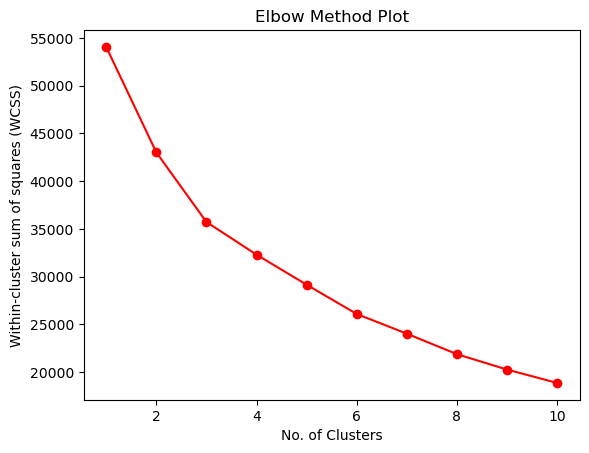

<Figure size 640x480 with 0 Axes>

In [23]:
plt.plot(range(1, 11), wcss, color = 'red', marker='o', linestyle='-')
plt.title('Elbow Method Plot')
plt.xlabel('No. of Clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.show()
plt.savefig('../reports/figures/elbow_plot.jpg')

In [9]:
# Computing Silhouette Score

scores = []

for i in range(2, 11):  
    s_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusters = s_kmeans.fit_predict(x_std)

    avg = silhouette_score(x_std, clusters)
    scores.append(avg)

/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/cluster/_kme

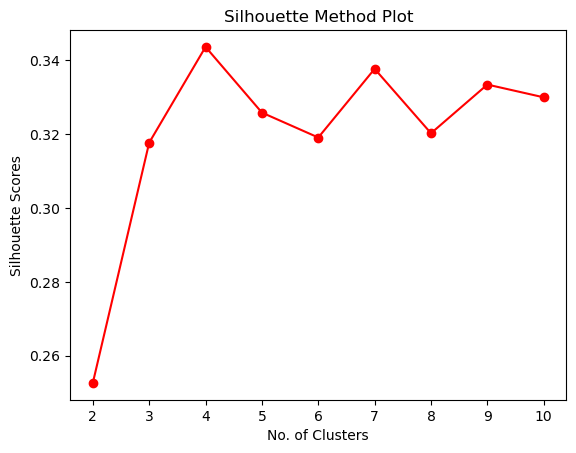

<Figure size 640x480 with 0 Axes>

In [10]:
plt.plot(range(2, 11), scores, color = 'red', marker='o', linestyle='-')
plt.title('Silhouette Method Plot')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Scores')
plt.show()
plt.savefig('../reports/figures/silhouette_plot.jpg')

In [11]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(x_std)

/opt/homebrew/anaconda3/envs/python-basic/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


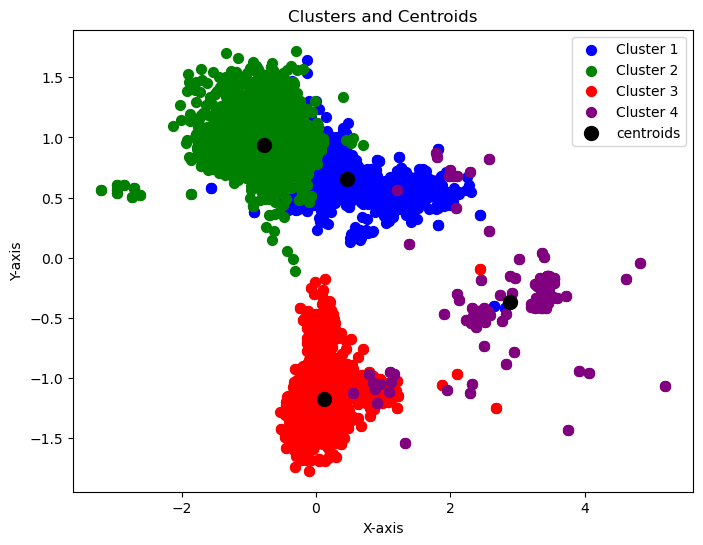

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple']
for i in range(4): 
    plt.scatter(x_std[clusters == i, 0], x_std[clusters == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='centroids')
plt.title('Clusters and Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
plt.savefig('../reports/figures/clustering_1.jpg')

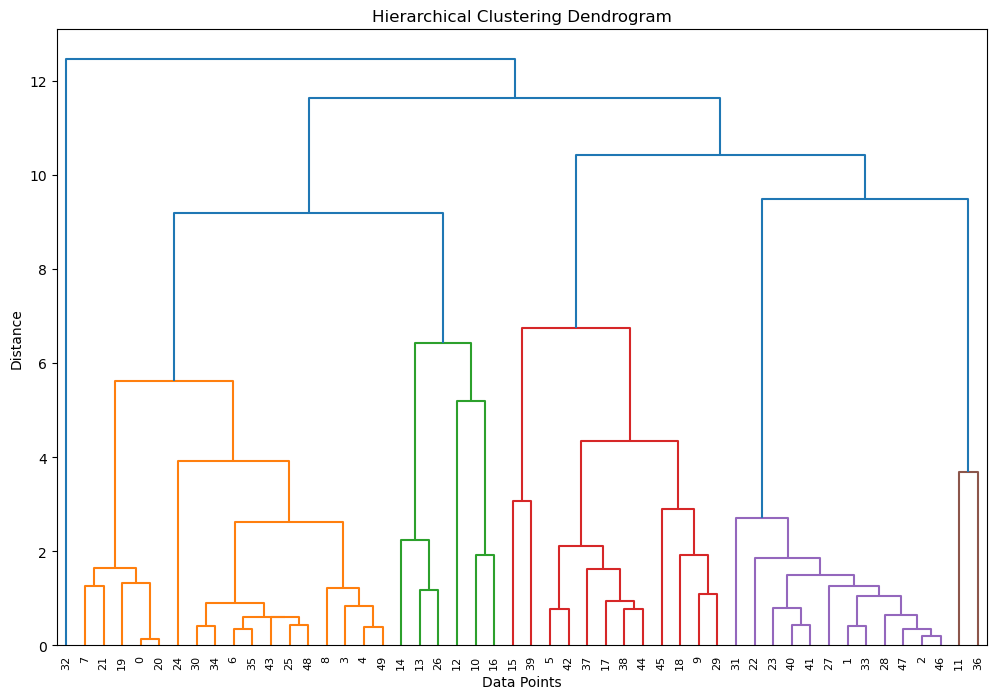

<Figure size 640x480 with 0 Axes>

In [20]:
# We have to sample the data first else all the data points can't be plotted

sample = 50
sample_indices = np.random.choice(len(x_std), size=sample, replace=False)
sample_dataset = x_std[sample_indices]
linkageMatrix = linkage(sample_dataset, method='ward')


plt.figure(figsize=(12, 8))
dendrogram(linkageMatrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
plt.savefig('../reports/figures/clustering_2.jpg')